# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv('Iris.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing the data.

## Splitting the data into train-test sets.

In [2]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

## Normalizing features using Min-max scaling.

In [3]:
scaling = sk.preprocessing.MinMaxScaler()
X_norm = scaling.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

X_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# KNN Model.

## Training the model.

In [4]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_norm, y, test_size=0.2, random_state=13)
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## Model optimization.
Optimizing the model for different values of K.

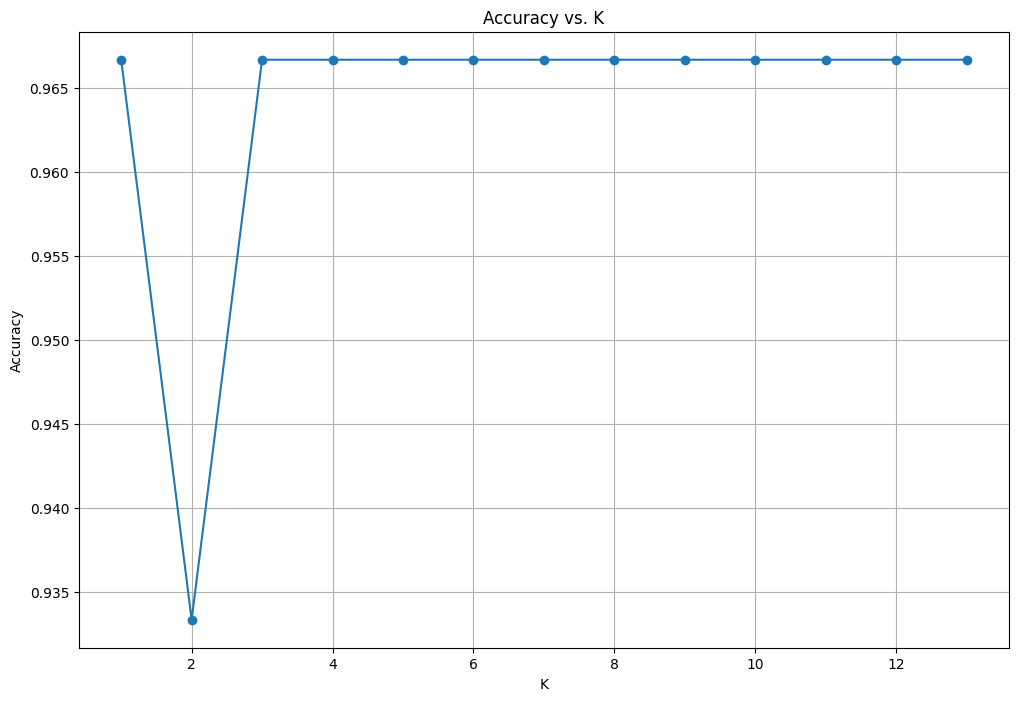

Optimal K: 1
Optimal Accuracy: 0.9666666666666667


In [5]:
k_vals = range(1, 14)
accuracy_scores = []
knn_models = []

for k in k_vals:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = sk.metrics.accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

opt_k = k_vals[accuracy_scores.index(max(accuracy_scores))]
opt_accuracy = max(accuracy_scores)

plt.figure(figsize=(12, 8))
plt.plot(k_vals, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.grid(True)
plt.show()

print(f"Optimal K: {opt_k}")
print(f"Optimal Accuracy: {opt_accuracy}")

## Model Evaluation.

In [6]:
# Training the KNN model for optimal value of K=1
opt_knn = sk.neighbors.KNeighborsClassifier(n_neighbors=opt_k)
opt_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Accuracy: 0.9666666666666667


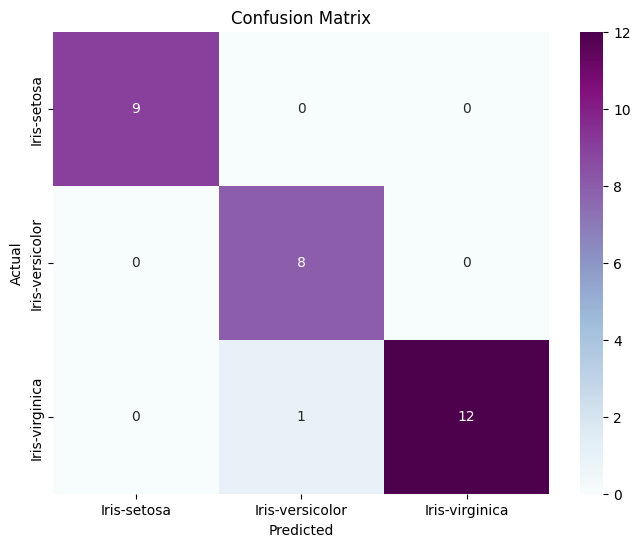

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing the Decision Boundaries.

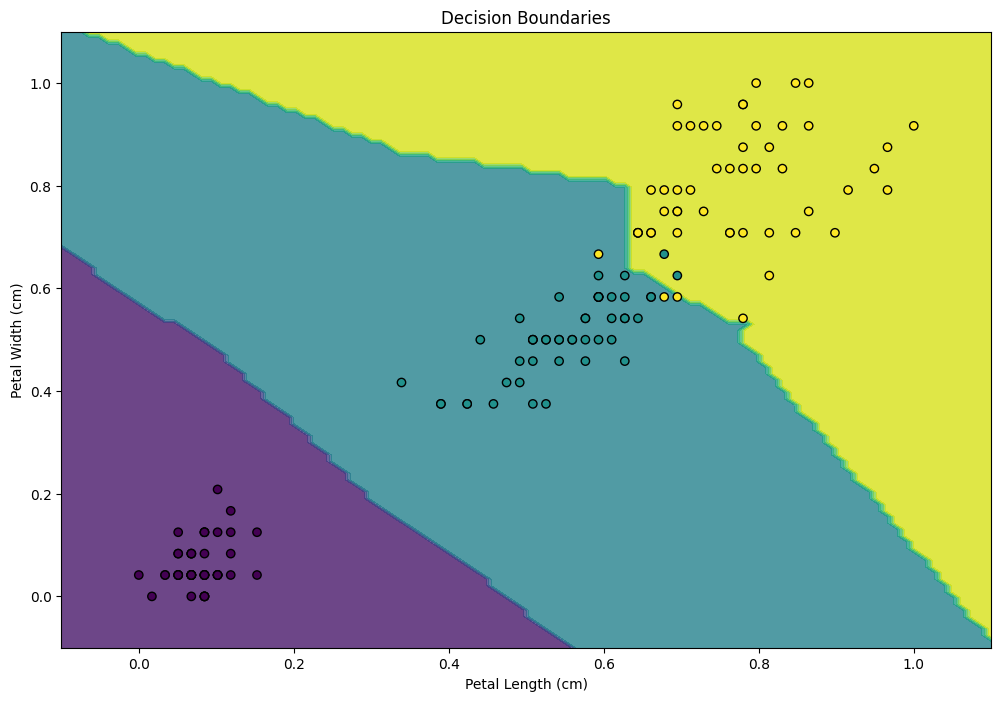

In [8]:
import numpy as np

# Creating meshgrid
x_min = X_norm['PetalLengthCm'].min() - 0.1
x_max = X_norm['PetalLengthCm'].max() + 0.1
y_min = X_norm['PetalWidthCm'].min() - 0.1
y_max = X_norm['PetalWidthCm'].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_df = pd.DataFrame({'PetalLengthCm': xx.ravel(), 'PetalWidthCm': yy.ravel()})
mesh_df['SepalLengthCm'] = X_train['SepalLengthCm'].mean()
mesh_df['SepalWidthCm'] = X_train['SepalWidthCm'].mean()
mesh_df = mesh_df[X_train.columns]

# Model Prediction

Z = opt_knn.predict(mesh_df)
Z = Z.reshape(xx.shape)

class_map = {label: idx for idx, label in enumerate(np.unique(Z))}
Z_numeric = np.vectorize(class_map.get)(Z)


plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z_numeric, alpha=0.8)
plt.scatter(X_norm['PetalLengthCm'], X_norm['PetalWidthCm'], c=y.map(class_map), edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundaries')
plt.show()